# 시계열 데이터의 성질

In [29]:
# Kpss 불러오기
from statsmodels.tsa.stattools import kpss

# 시계열 테스트 데이터
time_series_data_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# KPSS 검정 수행
kpss_outputs = kpss(time_series_data_test)

# 검정 결과 출력
print('KPSS test 결과 : ')
print('--'*15)
print('KPSS Statistic:', kpss_outputs[0])
print('p-value:', kpss_outputs[1])

KPSS test 결과 : 
------------------------------
KPSS Statistic: 0.5941176470588235
p-value: 0.023171122994652404


In [30]:
# adfuller 불러오기
from statsmodels.tsa.stattools import adfuller

# 시계열 테스트 데이터
time_series_data_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# ADF 검정 수행
adf_outputs = adfuller(time_series_data_test)

# 검정 결과 출력
print('ADF Test 결과 : ')
print('--'*15)
print('ADF Statistic:', adf_outputs[0])
print('p-value:', adf_outputs[1])

ADF Test 결과 : 
------------------------------
ADF Statistic: 0.0
p-value: 0.958532086060056


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 시계열 데이터 정의
time_series_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
time_series_data = [random.randint(1, 100) for _ in range(50)]

# 시계열 데이터 로그변환
time_series_data_log = np.log(time_series_data)

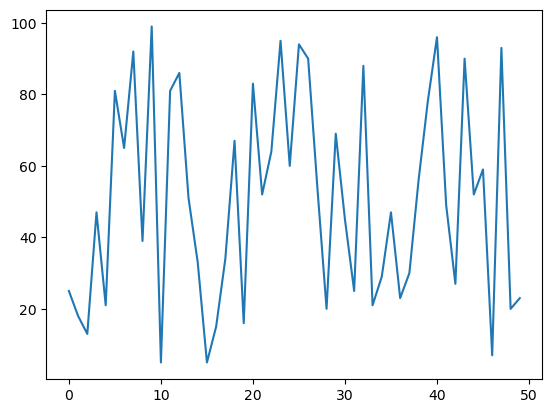

In [32]:
# 로그 변환되지 않은 시계열 데이터 시각화
plt.plot(time_series_data)
plt.show()

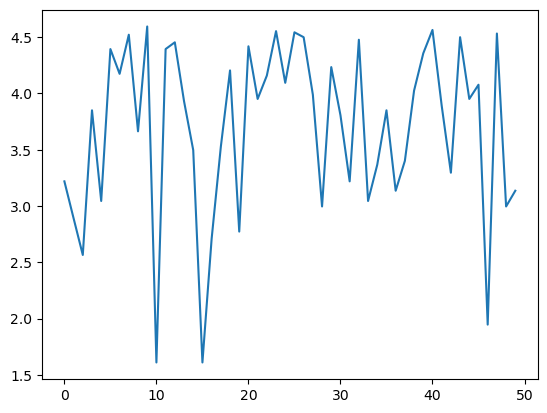

In [33]:
import matplotlib.pyplot as plt

# 로그 변환된 시계열 데이터 시각화
plt.plot(time_series_data_log)
plt.show()

## 평활

array([<Axes: >, <Axes: >], dtype=object)

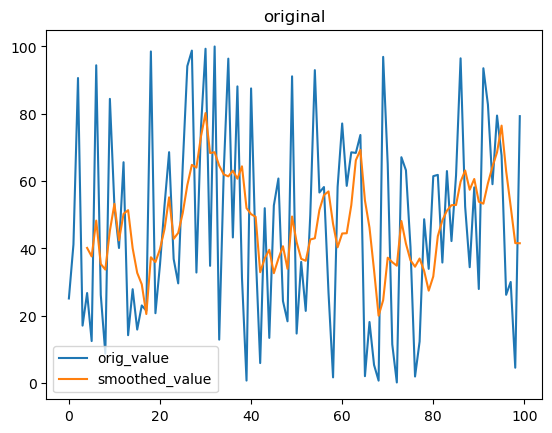

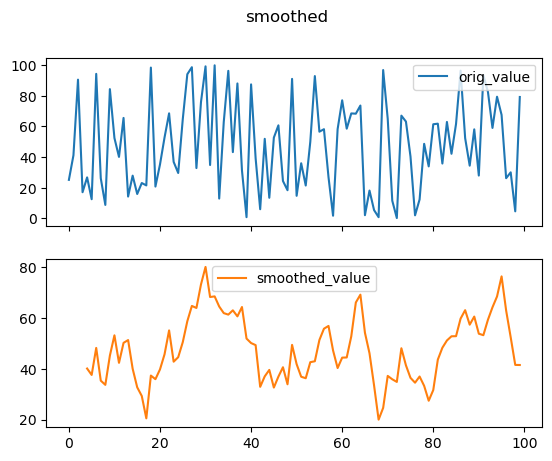

In [34]:
import random
import pandas as pd

## 평활 방법 코드

# 랜덤한 수를 가지고 있는 Pandas 데이터프레임을 생성
df0 = pd.DataFrame({'orig_value': [random.uniform(0, 100) for _ in range(100)]})
df1 = pd.DataFrame({'orig_value': [random.uniform(0, 100) for _ in range(100)]})

df0['smoothed_value'] = df0['orig_value'].rolling(5).mean()

# 잡음이 포함된 시계열 데이터를 시각화
df0.plot(legend=True, title='original')

# 잡음이 제거된 시계열 데이터를 시각화
df0.plot(legend=True, subplots=True, title='smoothed')

array([<Axes: >, <Axes: >], dtype=object)

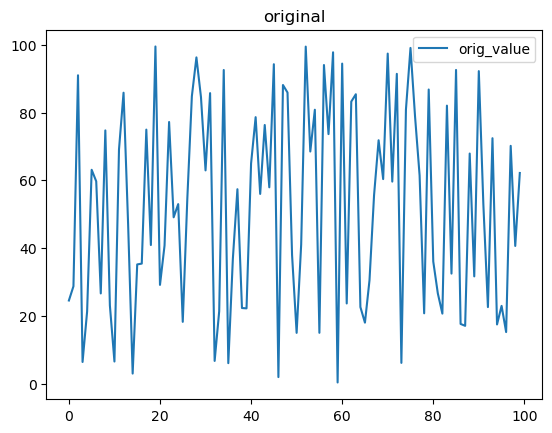

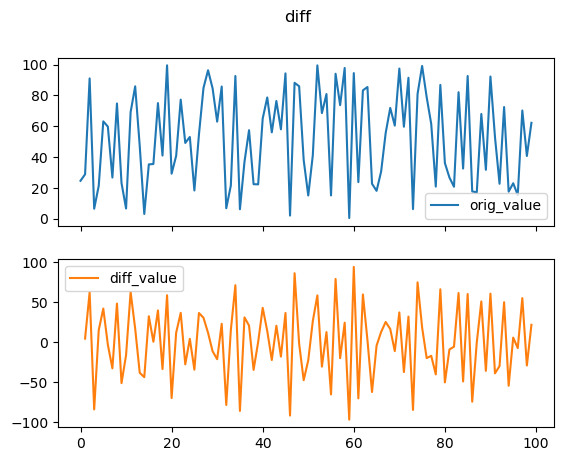

In [35]:
# 위에서 사용한 잡음이 있는 데이터를 그대로 활용하여 시각화합니다.
df1.plot(title='original')

# 차분을 적용하고 시각화합니다.
df1['diff_value'] = df1['orig_value'].diff()
df1.plot(legend=True, subplots=True, title='diff')

# 시계열 데이터 EDA

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# 해당 경로에 있는 EuStockMarkets의 csv파일
# eustockmarkets = pd.read_csv('/aiffel/aiffel/time_series_basic/EuStockMarkets.csv')
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/EuStockMarkets.csv"
eustockmarkets = pd.read_csv(url)

In [38]:
eustockmarkets.head()

,rownames,DAX,SMI,CAC,FTSE
0,1,1628.75,1678.1,1772.8,2443.6
1,2,1613.63,1688.5,1750.5,2460.2
2,3,1606.51,1678.6,1718.0,2448.2
3,4,1621.04,1684.1,1708.1,2470.4
4,5,1618.16,1686.6,1723.1,2484.7


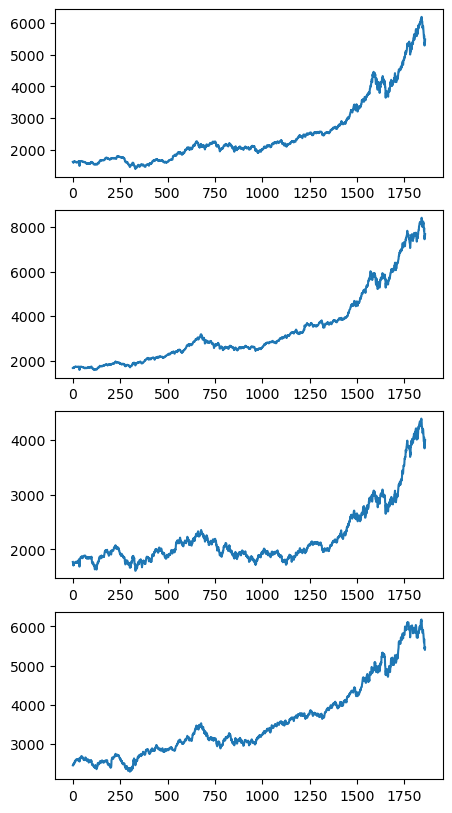

In [39]:
plt.figure(figsize = (5,10)) # 가로5, 세로10인치의 전체 figure를 생성
plt.subplot(4,1,1) # 가로4칸, 세로1칸, axis 1의 subplot을 생성
plt.plot(eustockmarkets['DAX']) # EustockMarket 데이터셋에서 'DAX' columns plot
plt.subplot(4,1,2)
plt.plot(eustockmarkets['SMI'])
plt.subplot(4,1,3)
plt.plot(eustockmarkets['CAC'])
plt.subplot(4,1,4)
plt.plot(eustockmarkets['FTSE'])
plt.show()

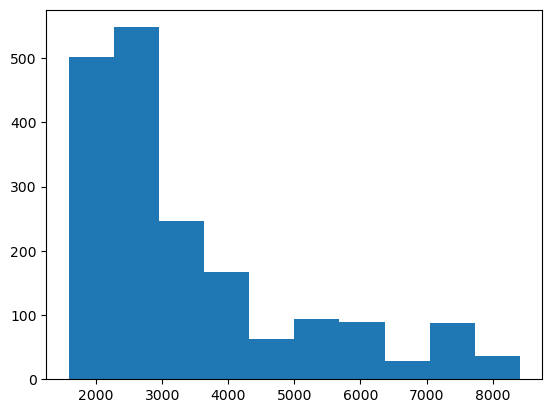

In [40]:
# DAX columns 히스토그램 생성
plt.hist(eustockmarkets['SMI'])
plt.show()

In [41]:
print(eustockmarkets['SMI'])
print('--' * 20)

diff = eustockmarkets['SMI'].diff() # 각 인덱스의 요소끼리의 차이를 계산합니다.
print(diff) # 바로 위에 출력된 값과 diff 변수에서 나온 출력값의 차이를 비교해보세요.

0       1678.1
1       1688.5
2       1678.6
3       1684.1
4       1686.6
         ...  
1855    7721.3
1856    7447.9
1857    7607.5
1858    7552.6
1859    7676.3
Name: SMI, Length: 1860, dtype: float64
----------------------------------------
0         NaN
1        10.4
2        -9.9
3         5.5
4         2.5
        ...  
1855   -231.6
1856   -273.4
1857    159.6
1858    -54.9
1859    123.7
Name: SMI, Length: 1860, dtype: float64


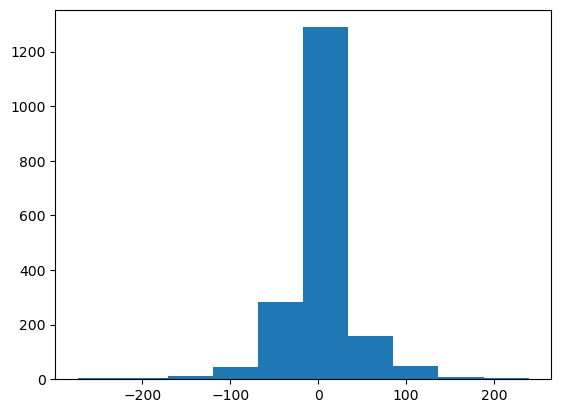

In [42]:
# 차분이 적용된 DAX 히스토그램 생성
plt.hist(diff)
plt.show()

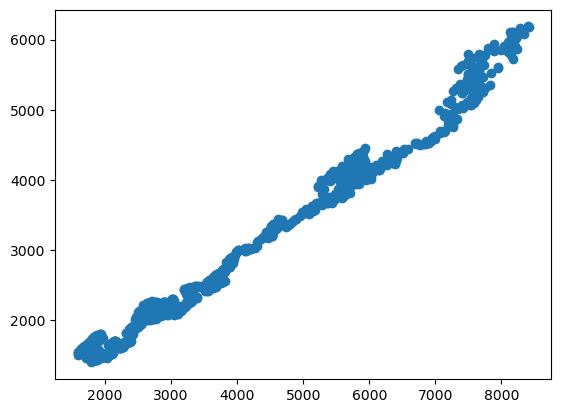

In [43]:
# SMI와 DAX를 비교한 산점도
plt.scatter(eustockmarkets['SMI'], eustockmarkets['DAX'])
plt.show()

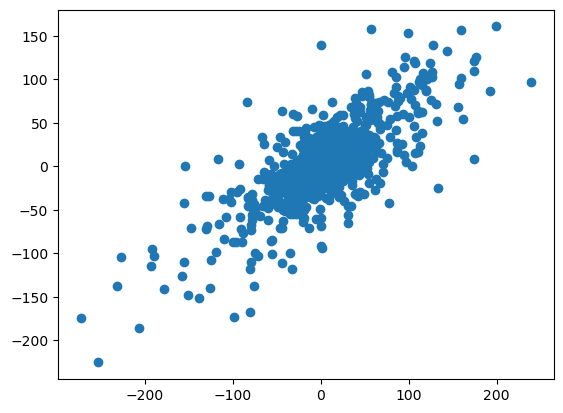

In [44]:
# 차분이 적용된 SMI와 DAX를 비교한 산점도
plt.scatter(eustockmarkets['SMI'].diff(), eustockmarkets['DAX'].diff())
plt.show()

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# statsmodels은 통계 모델 추정, 통계 결과, 통계 데이터 탐색을 지원하는 python 모듈

In [46]:
x = np.array(range(100)) # 0~99까지 생성
y = np.sin(x + np.pi/3) # X에 0부터 99까지 할당하고, 이를 numpy.sin에 통과시키면 사인 함수 값이 도출

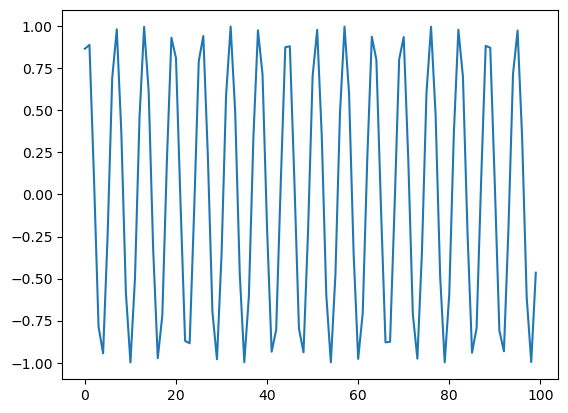

In [47]:
plt.plot(y)
plt.show()

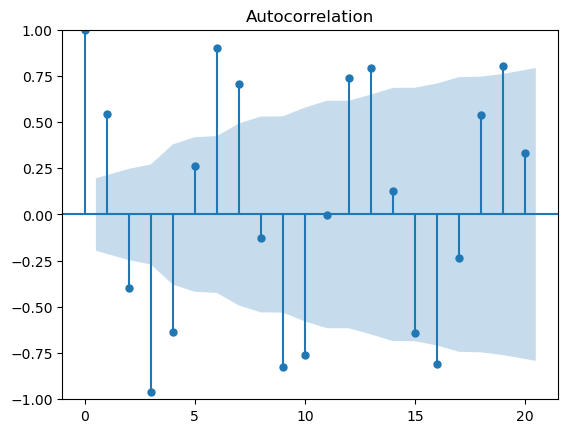

In [48]:
plot_acf(y)
plt.show()

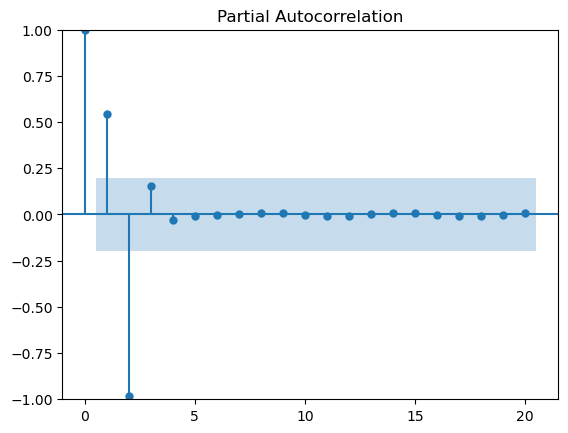

In [49]:
plot_pacf(y)
plt.show()

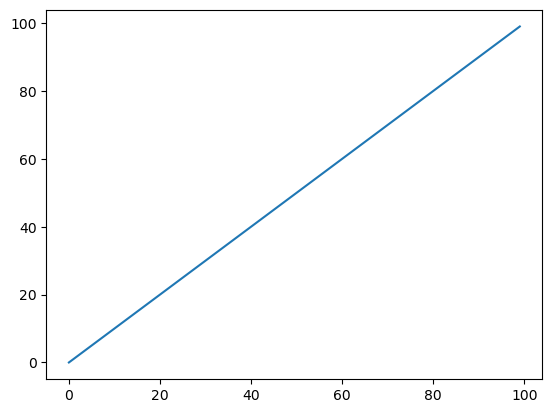

In [50]:
plt.plot(x)
plt.show()

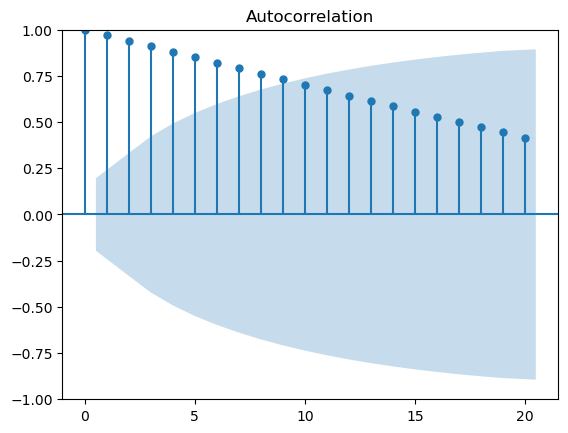

In [51]:
plot_acf(x)
plt.show()

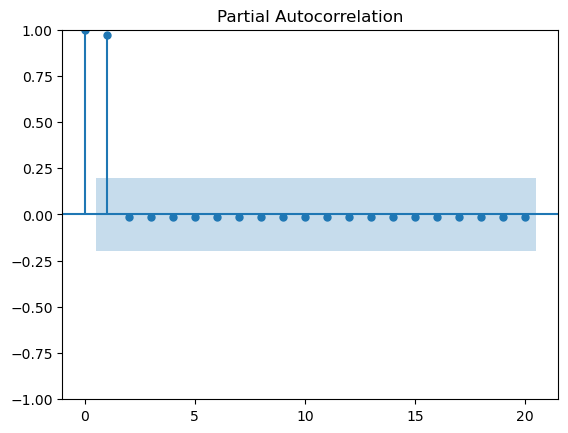

In [52]:
plot_pacf(x)
plt.show()